In [1]:
import torch
import requests
from PIL import Image
from io import BytesIO
import os
from nn import LightingStableDiffusion
from config import BASE_MODEL_NAME, MODEL_NAME, CHECKPOINTS_DIR
from diffusers import (
    StableDiffusionPipeline,
    DiffusionPipeline,
    StableDiffusionInpaintPipeline,
)
from config import DEVICE, BASE_MODEL_NAME


In [9]:

# load the pipeline
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16).to(
    DEVICE
)


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

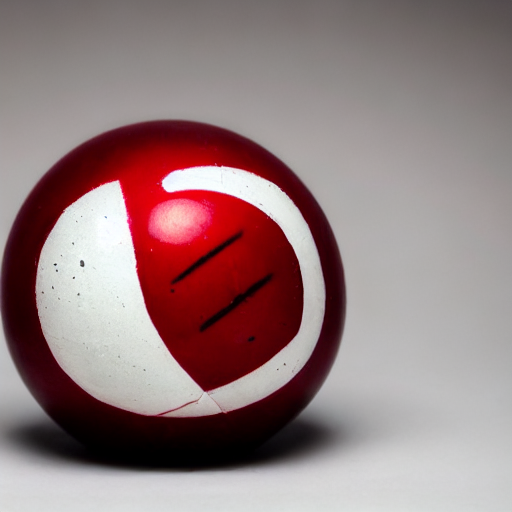

In [10]:
# let's download an initial image
url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

# print("Downloading images...")
response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image.thumbnail((762, 728))

# print("Generating images...")
prompt = "a red and white ball with an angry look on its face"

# images = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images
images = pipe(
    prompt=prompt,
).images
images[0]

In [8]:
# img1 = Image.open('wro.png').convert("RGB")
img2 = Image.open('ams.png').convert("RGB")
# img1.thumbnail((100, 100))
img2.thumbnail((700, 700))

In [9]:
i = pipe(prompt='Map of village', image=img2, strength=0.75, guidance_scale=7.5).images[0].save('test.png')
i

100%|██████████| 37/37 [00:15<00:00,  2.34it/s]


In [4]:

content_img_path = 'data/wro.png'
style_img_path = 'data/ams.png'

In [5]:
from PIL import Image
import torchvision.transforms as transfroms


trans = transfroms.Compose([
    transfroms.PILToTensor(),
    transfroms.Resize((500, 1000))
])

content_image = Image.open(content_img_path).convert("RGB")
style_image = Image.open(style_img_path).convert("RGB")

content_image.thumbnail((400, 200))
style_image.thumbnail((400, 200))

In [8]:
from guertena import style_transfer

result = style_transfer(style_image, content_image, num_steps=1000)

/home/marcin/Documents/mgr/semestr_II/nlp/nlp_l2/nlp_venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/marcin/Documents/mgr/semestr_II/nlp/nlp_l2/nlp_venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


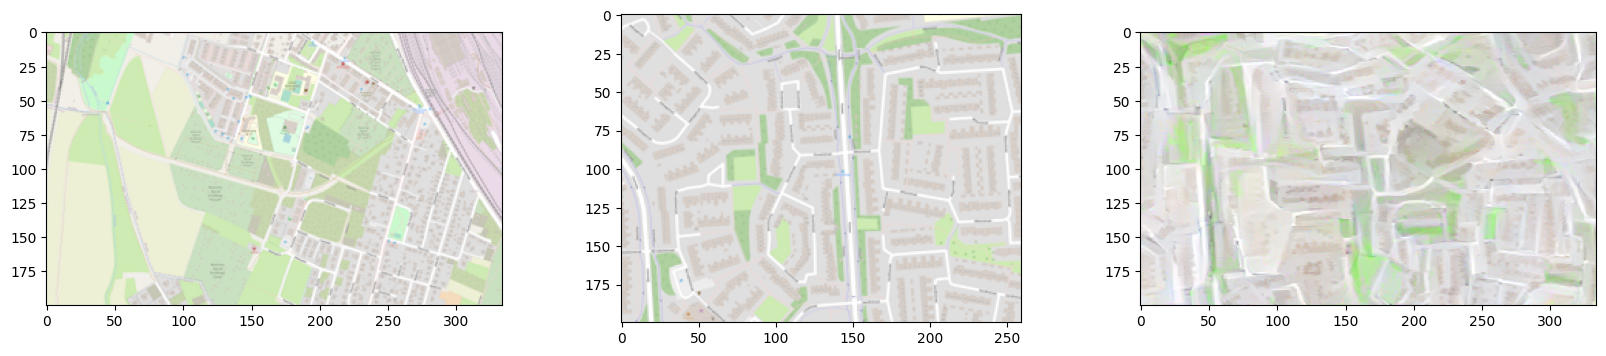

In [7]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,4))

ax1.imshow(content_image)
ax2.imshow(style_image)
ax3.imshow(result)

plt.show()

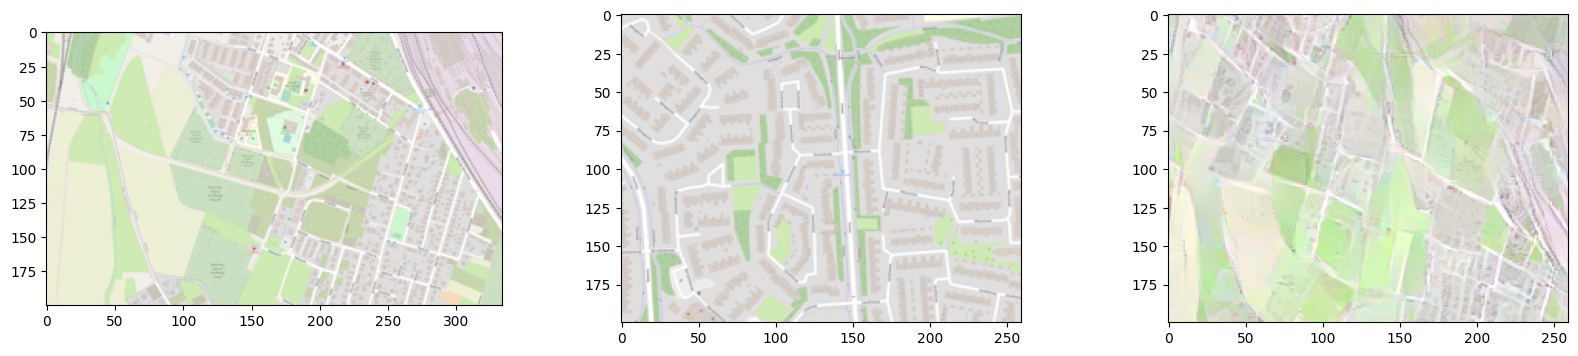

In [9]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,4))

ax1.imshow(content_image)
ax2.imshow(style_image)
ax3.imshow(result)

plt.show()

100%|██████████| 40/40 [00:04<00:00,  8.83it/s]


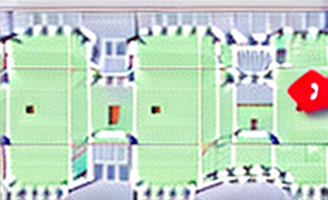

In [10]:
from diffusers import StableDiffusionImg2ImgPipeline

pipeline = StableDiffusionImg2ImgPipeline.from_pretrained('stabilityai/stable-diffusion-2-1-base')

pipeline = pipeline.to(DEVICE)
pipeline(prompt='Replace green area in left part of map with residential area', image=content_image).images[0]

In [ ]:
model = LightingStableDiffusion.load_from_checkpoint(
        os.path.join(CHECKPOINTS_DIR, f'{MODEL_NAME}.ckpt'), model_name=BASE_MODEL_NAME
    )
model.save_pipeline(os.path.join(CHECKPOINTS_DIR, f'{MODEL_NAME}_pipeline'))

In [2]:
prompt = "Map of area containing: 1 building yes 2 landuse farmlands 1 landuse residential 1 natural grassland 1 natural scrub ."
pipe = StableDiffusionPipeline.from_pretrained('OFA-Sys/small-stable-diffusion-v0').to(DEVICE)

The config attributes {'predict_epsilon': True} were passed to DPMSolverMultistepScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


  0%|          | 0/50 [00:00<?, ?it/s]

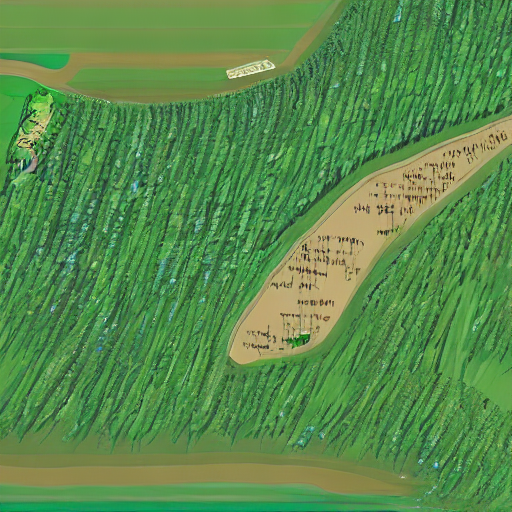

In [3]:
pipe(prompt=prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

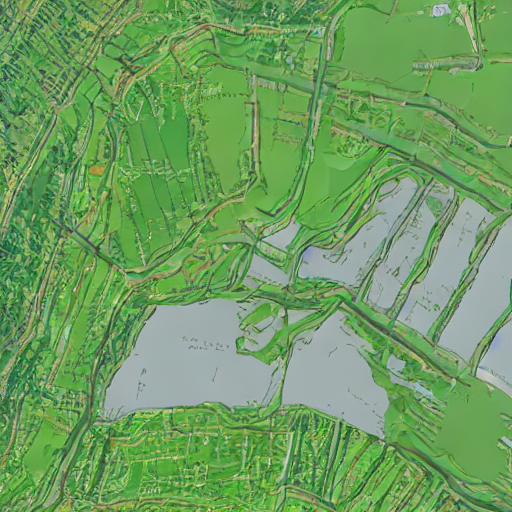

In [7]:
pipe_finetuned = StableDiffusionPipeline.from_pretrained('models/stable_wroclaw_pipeline').to(DEVICE)
pipe_finetuned(prompt=prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

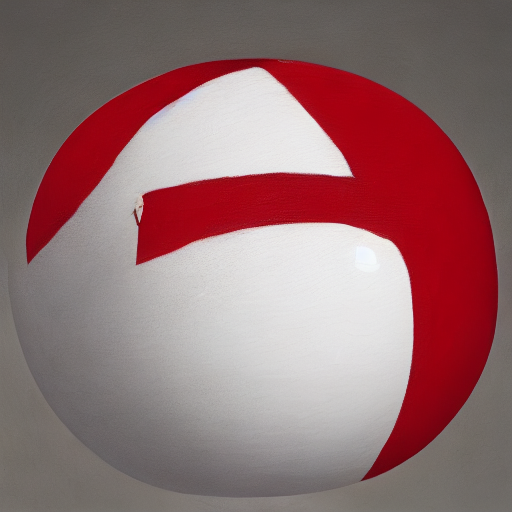

In [11]:
pipe_finetuned(prompt="a red and white ball with an angry look on its face").images[0]

In [6]:
from diffusers import AutoencoderKL

vae = AutoencoderKL.from_pretrained("OFA-Sys/small-stable-diffusion-v0", subfolder="vae")

In [7]:
from osm_dataset import TextToImageDataset
from config import DATA_DIR

ds = TextToImageDataset(DATA_DIR)

Resolving data files:   0%|          | 0/2145 [00:00<?, ?it/s]

Found cached dataset imagefolder (/home/marcin/.cache/huggingface/datasets/imagefolder/Wrocław, PL-16adbde1af182d57/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at /home/marcin/.cache/huggingface/datasets/imagefolder/Wrocław, PL-16adbde1af182d57/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f/cache-954ae8540c1d54bd.arrow


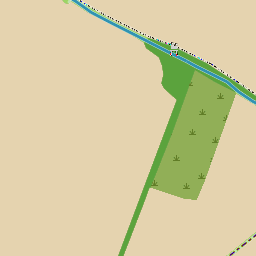

In [10]:
import torchvision.transforms.functional as ft



In [17]:
img.unsqueeze(0).shape

torch.Size([1, 3, 256, 256])

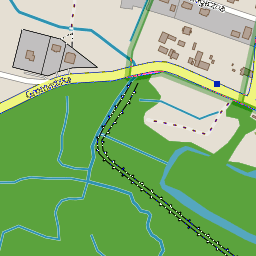

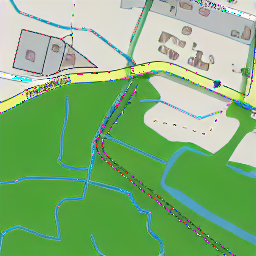

In [30]:
img = ds[110][0]
display(ft.to_pil_image(img))
with torch.no_grad():
    encoded = vae(img.unsqueeze(0))

# decoded = vae.decode(encoded)
ft.to_pil_image(encoded.sample.squeeze())